In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('QVI_purchase_behaviour.csv',)
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [3]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [4]:
no_of_unique_customer = df['LIFESTAGE'].nunique()
no_of_unique_customer

7

In [5]:
customer_count_per_lifestage = df['LIFESTAGE'].value_counts()
print("customer count per lifestage")
customer_count_per_lifestage

customer count per lifestage


LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [6]:
customer_count_per_premium_customer = df['PREMIUM_CUSTOMER'].value_counts()
print("customer count per premium customer")
customer_count_per_premium_customer

customer count per premium customer


PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [7]:
lifestage_premium_count = df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).size().unstack()
print('distribution of lifestage across premium customer')
lifestage_premium_count

distribution of lifestage across premium customer


LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,1504,1112,4675,4929,4454,4017,3779
Mainstream,3340,849,2831,4930,6479,2728,8088
Premium,2431,588,2274,4750,3872,2433,2574


In [8]:
dlf = df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).size().unstack()
print('lifestage with most premium customer')
dlf.idxmax(1)

lifestage with most premium customer


PREMIUM_CUSTOMER
Budget        OLDER SINGLES/COUPLES
Mainstream    YOUNG SINGLES/COUPLES
Premium       OLDER SINGLES/COUPLES
dtype: object

In [9]:
lifestage_premium_count = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Customer_Count')
print('combination of lifestage and premium customer')
lifestage_premium_count

combination of lifestage and premium customer


,LIFESTAGE,PREMIUM_CUSTOMER,Customer_Count
0,MIDAGE SINGLES/COUPLES,Budget,1504
1,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Premium,2431
3,NEW FAMILIES,Budget,1112
4,NEW FAMILIES,Mainstream,849
5,NEW FAMILIES,Premium,588
6,OLDER FAMILIES,Budget,4675
7,OLDER FAMILIES,Mainstream,2831
8,OLDER FAMILIES,Premium,2274
9,OLDER SINGLES/COUPLES,Budget,4929


<function matplotlib.pyplot.show(close=None, block=None)>

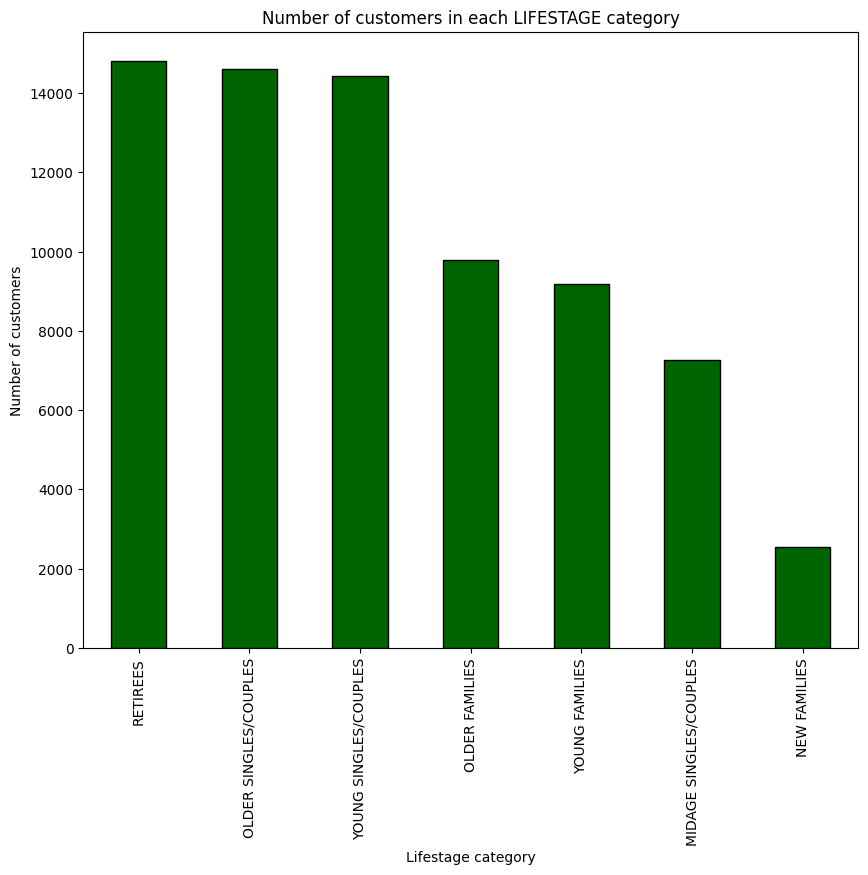

In [20]:
customer_in_lifestage_count = df['LIFESTAGE'].value_counts()
customer_in_lifestage_count.plot(kind='bar', color='darkgreen', edgecolor='black', figsize=(10,8))
plt.xlabel("Lifestage category")
plt.ylabel("Number of customers")
plt.title("Number of customers in each LIFESTAGE category")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

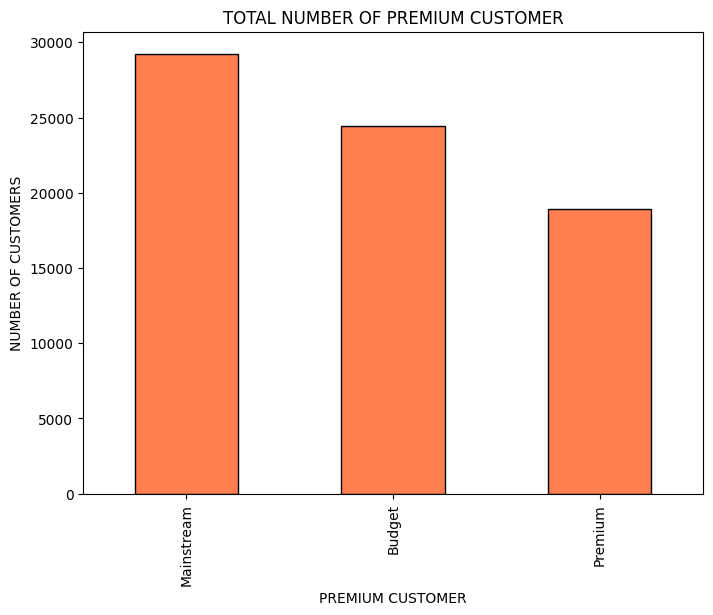

In [16]:
premium_customer_count = df['PREMIUM_CUSTOMER'].value_counts()
premium_customer_count.plot(kind='bar', color='coral', edgecolor='black', figsize=(8,6))
plt.xlabel("PREMIUM CUSTOMER")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.title("TOTAL NUMBER OF PREMIUM CUSTOMER")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

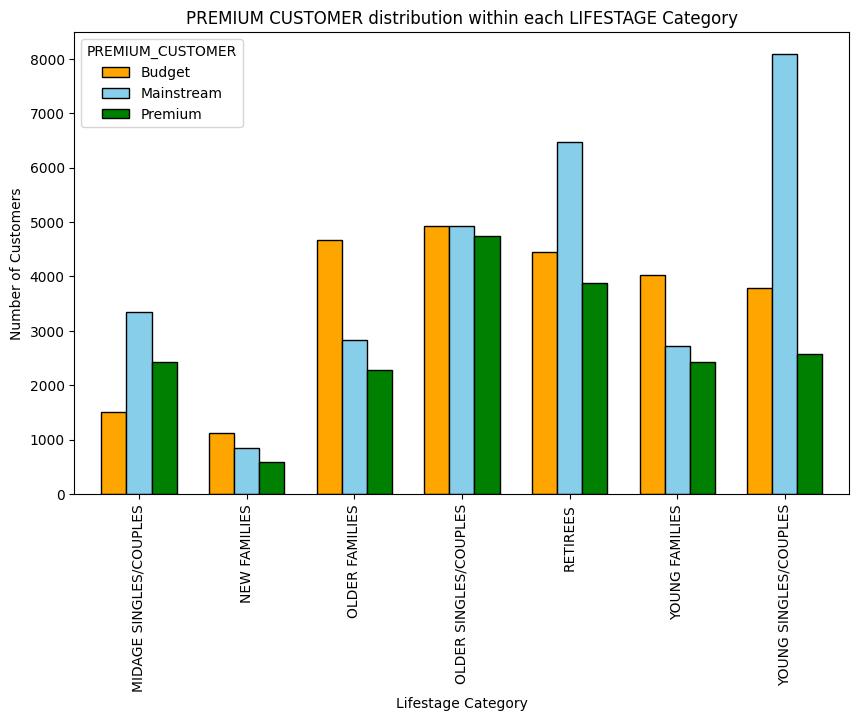

In [12]:
grouped = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().unstack()
grouped.plot(kind='bar', figsize=(10, 6), width=0.7, color=['orange', 'skyblue', 'green'], edgecolor='black')
plt.xlabel("Lifestage Category")
plt.ylabel("Number of Customers")
plt.title("PREMIUM CUSTOMER distribution within each LIFESTAGE Category")
plt.show

In [13]:
profile = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size()
most_common_profile = profile.idxmax()
most_common_count = profile.max()
print("The most common customer profile is",most_common_profile, "with", most_common_count, "customers.")


The most common customer profile is ('YOUNG SINGLES/COUPLES', 'Mainstream') with 8088 customers.


In [14]:
profile = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size()
least_common_profile = profile.idxmin()
least_common_count = profile.min()
print("The least common customer profile is",least_common_profile, "with", least_common_count, "customers.")

The least common customer profile is ('NEW FAMILIES', 'Premium') with 588 customers.


<function matplotlib.pyplot.show(close=None, block=None)>

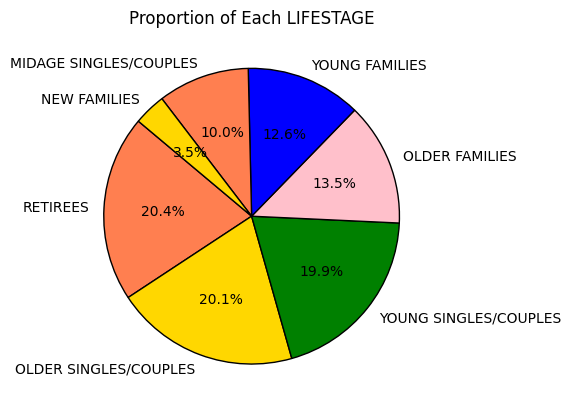

In [15]:
lifestage_counts = df['LIFESTAGE'].value_counts()
plt.pie(lifestage_counts, labels=lifestage_counts.index, 
        autopct='%1.1f%%', startangle=140,
        colors=['coral', 'gold', 'green', 'pink', 'blue'],
        wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Each LIFESTAGE")
plt.show